# HW1

Importing libraries and files

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
from sklearn.metrics import roc_auc_score # roc_auc scoring
from sklearn.model_selection import KFold # splitting data
from sklearn import linear_model # linear models
from sklearn.model_selection import GridSearchCV, train_test_split # importing splitting train data and optimal hyperparameter search
from sklearn.ensemble import RandomForestClassifier #Random forest
from xgboost import XGBClassifier #XGBClassifier

In [2]:
#reading files and making dataframes out of them
sample = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

## Train data analysis

Let's look at the train data

In [3]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


Let's look at how numerical data correlates between each other. The correlation matrix is constructed using Pearsons's correlation coefficient, $r \in [-1, 1]$, where -1 means total negative linear correlation, 1 means total positive linear correlation.

In [4]:
cor = train.corr()
cor.style.background_gradient(cmap='coolwarm')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1,0.0134422,0.00982343,0.00682854,0.0221249,0.0176893,0.00736639
age,0.0134422,1,0.274369,0.25277,0.234806,0.35584,0.152684
hypertension,0.00982343,0.274369,1,0.121906,0.161272,0.161511,0.0734252
heart_disease,0.00682854,0.25277,0.121906,1,0.149709,0.0609177,0.101548
avg_glucose_level,0.0221249,0.234806,0.161272,0.149709,1,0.188645,0.0874264
bmi,0.0176893,0.35584,0.161511,0.0609177,0.188645,1,0.020317
stroke,0.00736639,0.152684,0.0734252,0.101548,0.0874264,0.020317,1


Let's find out, how different categorical data is distributed. For this purpuse, let's construct pie diagrams.

In [5]:
train.gender.value_counts()

Female    17676
Male      12315
Other        10
Name: gender, dtype: int64

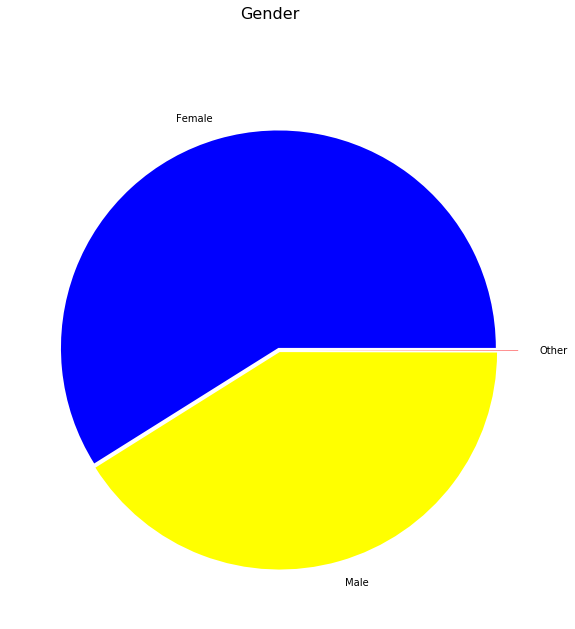

In [6]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Gender', fontsize=16)
plt.pie(train.gender.value_counts(), labels=['Female', 'Male', 'Other'], explode=(0.01, 0.01, 0.1), colors=['Blue', 'Yellow', 'Red']) 
plt.show()

Here we can see that there are three genders represented, althoug "Other" is almost absent from the dataset. The "Male" part of the dataset is represented a bit worse than "Female". This is a bit innacurate, as male part of the population in the world is a bit bigger, than female.

In [7]:
train.hypertension.value_counts()

0    27165
1     2836
Name: hypertension, dtype: int64

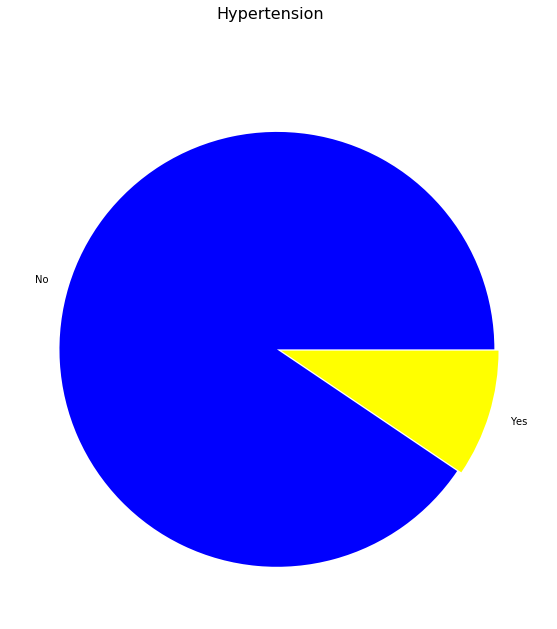

In [8]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Hypertension', fontsize=16)
plt.pie(train.hypertension.value_counts(), labels=['No', 'Yes'], explode=(0.01, 0.01), colors=['Blue', 'Yellow']) 
plt.show()

In this diagram it is seen that about 10\% of the dataset samples have hypertention. Generally, in the world, about 16-30\% are affected by it.

In [9]:
train.heart_disease.value_counts()

0    28566
1     1435
Name: heart_disease, dtype: int64

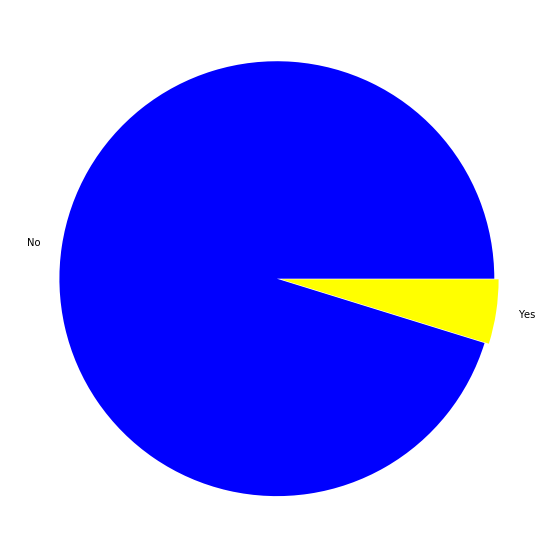

In [10]:
plt.figure(figsize=(10, 10))
fig.suptitle('Heart disease', fontsize=16)
plt.pie(train.heart_disease.value_counts(), labels=['No', 'Yes'], explode=(0.01, 0.01), colors=['Blue', 'Yellow']) 
plt.show()

From this diagram, it can be seen that about 5\% of the samples represented in the dataset have some kind of heart disease

In [11]:
train.ever_married.value_counts()

Yes    19376
No     10625
Name: ever_married, dtype: int64

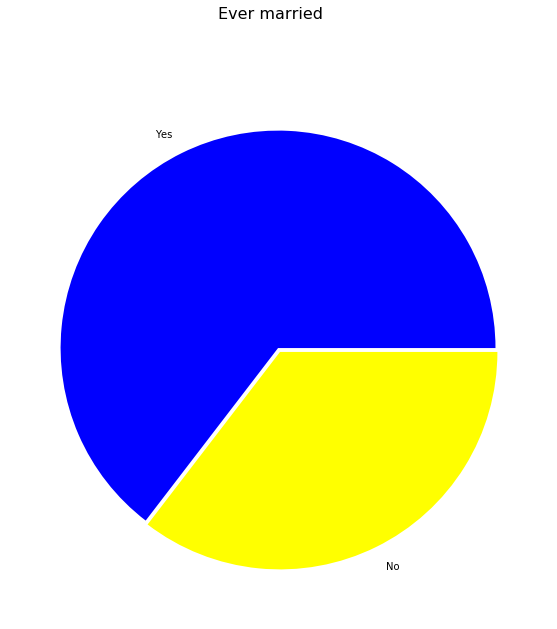

In [12]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Ever married', fontsize=16)
plt.pie(train.ever_married.value_counts(), labels=['Yes', 'No'], explode=(0.01, 0.01), colors=['Blue', 'Yellow']) 
plt.show()

This diagram shows that about 2/3 of samples have ever been married.

In [13]:
train.work_type.value_counts()

Private          17220
Self-employed     4674
children          4188
Govt_job          3804
Never_worked       115
Name: work_type, dtype: int64

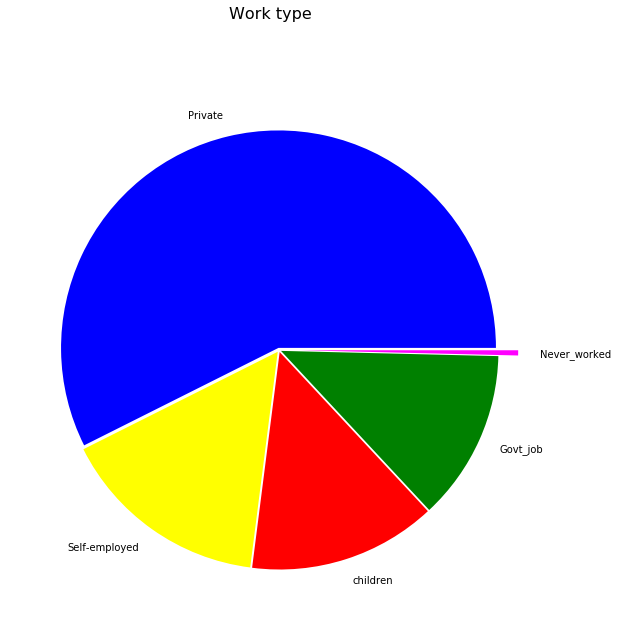

In [14]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Work type', fontsize=16)
plt.pie(train.work_type.value_counts(), labels=['Private', 'Self-employed', 'children', 'Govt_job', 
                                                'Never_worked'], explode=(0.01, 0.01, 0.01, 0.01, 0.1), 
                                         colors=['Blue', 'Yellow', 'Red', 'Green', 'Fuchsia']) 
plt.show()

This diagram shows the different work types samples have.

In [15]:
train.Residence_type.value_counts()

Urban    15028
Rural    14973
Name: Residence_type, dtype: int64

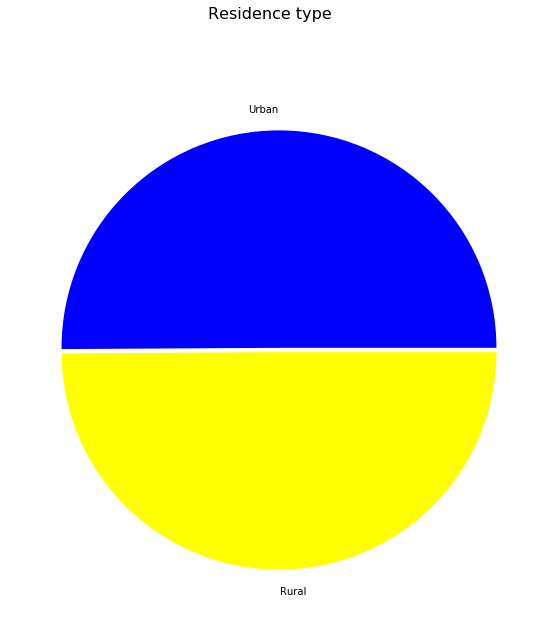

In [16]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Residence type', fontsize=16)
plt.pie(train.Residence_type.value_counts(), labels=['Urban', 'Rural'], explode=(0.01, 0.01), colors=['Blue', 'Yellow']) 
plt.show()

In this diagram it can be seen that about half of samples live in rural areas. As statistics show, a bit more people live in urban areas than in rural.

In [17]:
train['smoking_status'] = train['smoking_status'].fillna('no data')
test['smoking_status'] = test['smoking_status'].fillna('no data')
train.smoking_status.value_counts()

never smoked       11079
no data             9176
formerly smoked     5183
smokes              4563
Name: smoking_status, dtype: int64

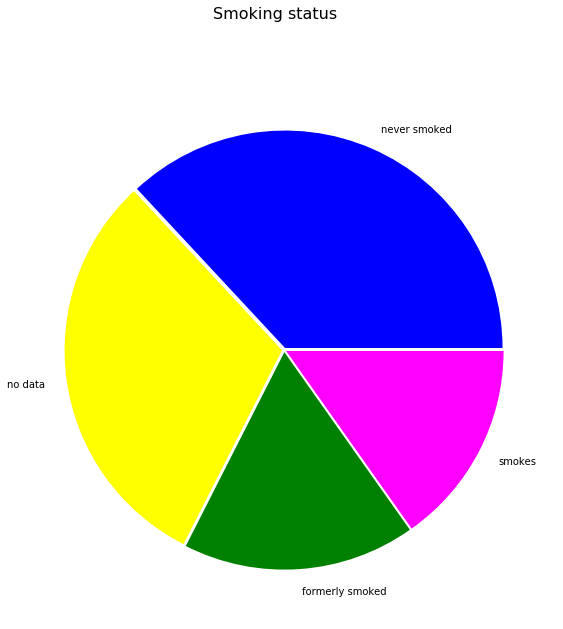

In [18]:
labels = list(['never smoked', 'no data', 'formerly smoked', 'smokes'])
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Smoking status', fontsize=16)
plt.pie(train.smoking_status.value_counts(), labels=labels,
        explode=(0.01, 0.01, 0.01, 0.01), colors=['Blue', 'Yellow', 'Green', 'Fuchsia']) 
plt.show()

This diagram shows sample smoking tendencies, but, as it can be seen, a large part of dataset does not have information about smoking status.

#### Now let's plot the distribution of numerical data. First, let's add mean BMI value to the NaN values.

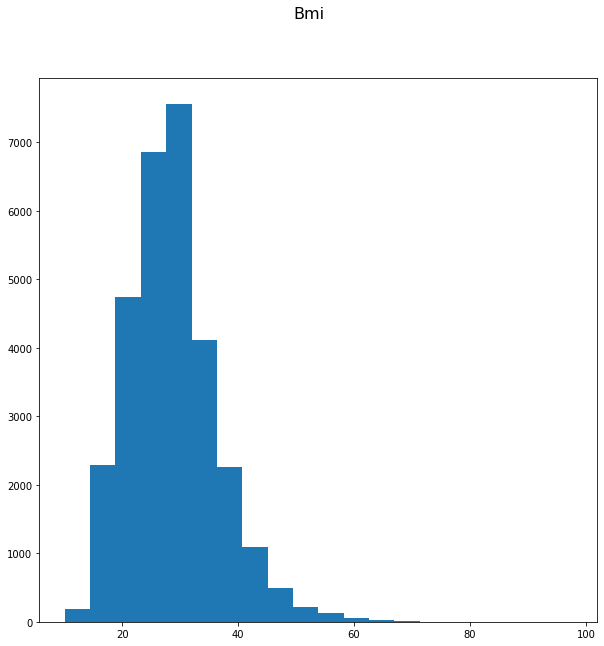

In [19]:
mean_bmi = train['bmi'].mean()
train['bmi'] = train['bmi'].fillna(mean_bmi)
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Bmi', fontsize=16)
plt.hist(train.bmi.values,bins=20) 
plt.show()

The healthy BMI values lie between 18.5 and 25. In this dataset, a lot of people are overweight.

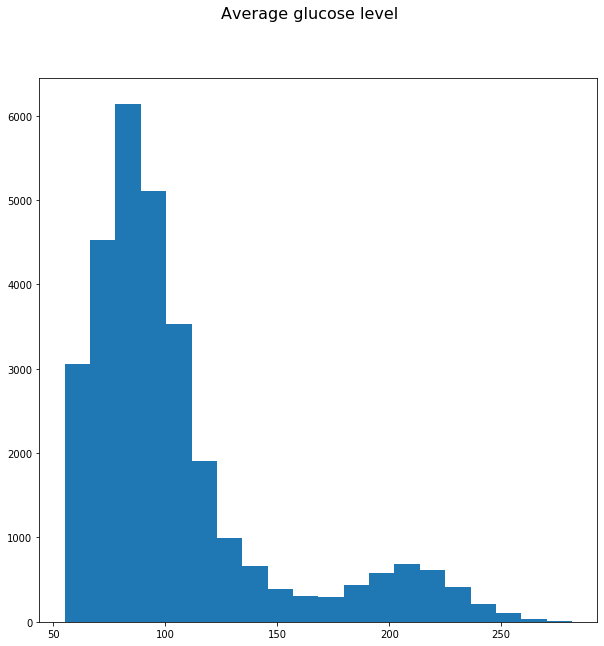

In [20]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Average glucose level', fontsize=16)
plt.hist(train.avg_glucose_level.values,bins=20) 
plt.show()

Although it is not indicated, average glucose level is probably measured in mg/dL. If so, the healthy values lie between 72 and 99.If more, a person has type 1 or 2 diabetes.

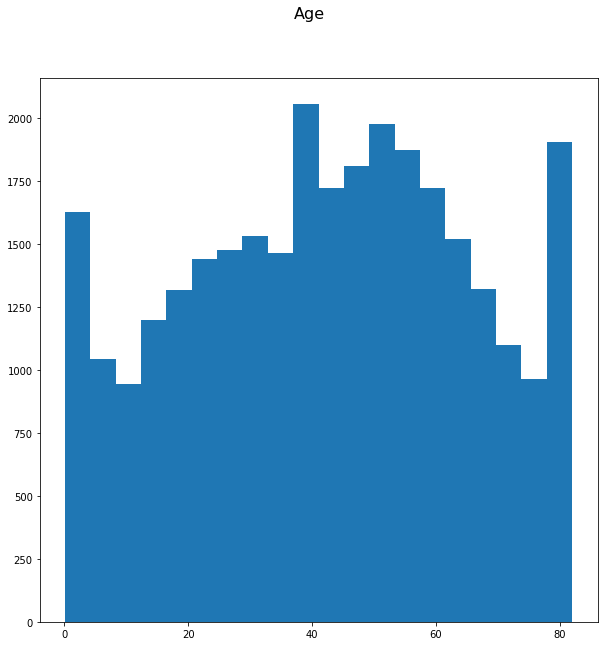

In [21]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Age', fontsize=16)
plt.hist(train.age.values,bins=20) 
plt.show()

From this histogram, it can be seen that most samples are adults about 40 - 60 years old

## Feature generation

First, let's add mean BMI to test dataset

In [22]:
test['bmi'] = test['bmi'].fillna(mean_bmi) # replacing none values

Let's replace ever married categories - "Yes" is 1, "No" is 0

In [23]:
ever_married_dict = {'Yes': 1, 'No':0 }
train['ever_married'] =train['ever_married'].replace(ever_married_dict)
test['ever_married'] = test['ever_married'].replace(ever_married_dict)

Let's generate new categories - "work_type_is...", if equals 1, than sample's work type is ..., else 0

In [24]:
#new columns for whether the sample belongs to the category or no
for i in train['work_type'].unique():
    train['work_type_is_{}'.format(i)] = (train['work_type'] == i)*1
    test['work_type_is_{}'.format(i)] = (test['work_type'] == i)*1

Let's replace smoking values with the mean number of strokes per smoking status type. Also, let's add columns with categorical features of smoking.

In [25]:
smoking_status_target_enc_dict = (train.groupby(['smoking_status'])['stroke'].agg(['mean'])).to_dict()['mean']
train['smoking_status_target_enc'] = train['smoking_status'].replace(smoking_status_target_enc_dict)
test['smoking_status_target_enc'] = test['smoking_status'].replace(smoking_status_target_enc_dict)
for i in train['smoking_status'].unique():
    train['smoking_status_is_{}'.format(i)] = (train['smoking_status'] == i)*1
    test['smoking_status_is_{}'.format(i)] = (test['smoking_status'] == i)*1

Now, let's replace residence type with 1 if it is urban, else with 0

In [26]:
residence_target_enc_dict = (train.groupby(['Residence_type'])['stroke'].agg(['mean'])).to_dict()['mean']
train['residence_target_enc'] = train['Residence_type'].replace(residence_target_enc_dict)
test['residence_target_enc'] = test['Residence_type'].replace(residence_target_enc_dict)
train['Residence_type'] = train['Residence_type'].replace({'Urban':0, 'Rural':1 })
test['Residence_type'] = test['Residence_type'].replace({'Urban':0, 'Rural':1 })

Now, let's also get mean stroke values for genders, as well as add categorical coulumns.

In [27]:
gender_target_enc_dict = (train.groupby(['gender'])['stroke'].agg(['mean'])).to_dict()['mean']
train['gender_target_enc'] = train['gender'].replace(gender_target_enc_dict)
test['gender_target_enc'] = test['gender'].replace(gender_target_enc_dict)
for i in train['gender'].unique():
    train['gender_is_{}'.format(i)] = (train['gender'] == i)*1
    test['gender_is_{}'.format(i)] = (test['gender'] == i)*1

Let's look at correlation matrix again.

In [28]:
cor = train.corr()
cor.style.background_gradient(cmap='coolwarm')

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_is_children,work_type_is_Private,work_type_is_Never_worked,work_type_is_Self-employed,work_type_is_Govt_job,smoking_status_target_enc,smoking_status_is_no data,smoking_status_is_never smoked,smoking_status_is_formerly smoked,smoking_status_is_smokes,residence_target_enc,gender_target_enc,gender_is_Male,gender_is_Female,gender_is_Other
id,1,0.0134422,0.00982343,0.00682854,0.0103896,-0.00292922,0.0221249,0.0172642,0.00736639,-0.0231707,0.0104678,0.0030009,0.00890824,-0.00168967,0.016353,-0.018663,0.00730014,0.00901506,0.00464516,0.00292922,-0.00228787,-0.00212938,0.00209269,0.000981793
age,0.0134422,1,0.274369,0.25277,0.689001,-0.00379178,0.234806,0.349115,0.152684,-0.638318,0.139042,-0.0672996,0.323558,0.118051,0.371383,-0.374952,0.106128,0.24249,0.0831952,0.00379178,-0.0268858,-0.0286153,0.0287619,-0.00404646
hypertension,0.00982343,0.274369,1,0.121906,0.177805,0.00355456,0.161272,0.153921,0.0734252,-0.129489,-0.00202975,-0.0181993,0.108435,0.0230801,0.117109,-0.11854,0.0339235,0.0762624,0.0262241,-0.00355456,0.024683,0.0240546,-0.0238327,-0.00590001
heart_disease,0.00682854,0.25277,0.121906,1,0.126129,0.00369086,0.149709,0.0570828,0.101548,-0.0893774,-0.00526293,-0.0139032,0.102257,-0.00795716,0.094484,-0.0592878,-0.0346053,0.082667,0.0355527,-0.00369086,0.0789185,0.080314,-0.0801523,-0.00409266
ever_married,0.0103896,0.689001,0.177805,0.126129,1,-0.0037969,0.151777,0.339788,0.0696781,-0.543941,0.155254,-0.0781295,0.1932,0.13975,0.29752,-0.322222,0.0949776,0.170825,0.105967,0.0037969,-0.0310325,-0.0332356,0.0334381,-0.00556847
Residence_type,-0.00292922,-0.00379178,0.00355456,0.00369086,-0.0037969,1,0.00493958,0.00268303,-0.00279046,0.00381615,-0.00286013,-0.00474096,0.00225812,-0.00130489,-4.29609e-05,0.00613607,-0.00308652,0.00639257,-0.0104546,-1,-0.00111611,-0.000299716,0.000162936,0.00368551
avg_glucose_level,0.0221249,0.234806,0.161272,0.149709,0.151777,0.00493958,1,0.181794,0.0874264,-0.111774,0.0099759,-0.0140917,0.0796244,0.0174259,0.104047,-0.0944188,0.0123528,0.0744069,0.0262169,-0.00493958,0.0346896,0.0340443,-0.0337708,-0.00725969
bmi,0.0172642,0.349115,0.153921,0.0570828,0.339788,0.00268303,0.181794,1,0.0184937,-0.450905,0.191899,-0.0189874,0.0844988,0.095882,0.230895,-0.271248,0.108983,0.119922,0.0753261,-0.00268303,-0.0224725,-0.0228507,0.0228015,0.00124868
stroke,0.00736639,0.152684,0.0734252,0.101548,0.0696781,-0.00279046,0.0874264,0.0184937,1,-0.0525561,0.00398609,-0.0083187,0.0470445,-0.000913844,0.0417432,-0.0313579,-0.00247592,0.0350963,0.00661584,0.00279046,0.0102607,0.0100003,-0.00990826,-0.00244875
work_type_is_children,-0.0231707,-0.638318,-0.129489,-0.0893774,-0.543941,0.00381615,-0.111774,-0.450905,-0.0525561,1,-0.467539,-0.0249861,-0.173036,-0.153489,-0.39812,0.51538,-0.236071,-0.16601,-0.169256,-0.00381615,0.0895023,0.0916739,-0.0915853,-0.00208623


From this correlation matrix it can be seen that there is a direct correlation between residence_target_enc and residence type, which is obvious, as one feature is derived from another. Also, there is a strong correlation and marriage status and smoking. Moreover, it is clearly seen that if featur eis derived from another (e.g. smoking_status_is... and smoking_status_enc_dict), the correlation is observed.

Taking a look at final features

In [29]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,smoking_status_target_enc,smoking_status_is_no data,smoking_status_is_never smoked,smoking_status_is_formerly smoked,smoking_status_is_smokes,residence_target_enc,gender_target_enc,gender_is_Male,gender_is_Female,gender_is_Other
0,30669,Male,3.0,0,0,0,children,1,95.12,18.0,...,0.011443,1,0,0,0,0.017298,0.019245,1,0,0
1,30468,Male,58.0,1,0,1,Private,0,87.96,39.2,...,0.017240,0,1,0,0,0.018033,0.019245,1,0,0
2,16523,Female,8.0,0,0,0,Private,0,110.89,17.6,...,0.011443,1,0,0,0,0.018033,0.016576,0,1,0
3,56543,Female,70.0,0,0,1,Private,1,69.04,35.9,...,0.027783,0,0,1,0,0.017298,0.016576,0,1,0
4,46136,Male,14.0,0,0,0,Never_worked,1,161.28,19.1,...,0.011443,1,0,0,0,0.017298,0.019245,1,0,0


## Choosing optimal hyperparameters for the model

First, let's split our train data 80:20, so that we always have a part to test on

In [30]:
res = train['stroke']
X_train, X_test, Y_train, Y_test = train_test_split(train, res, test_size=0.2)

Now, let's write our own cross-validation function, so that we will return the scores we need (ROC-AUC). 

In [31]:
def my_cross_validation_for_roc_auc(clf, X, y ,cv=5):
    X = np.array(X.copy())
    y = np.array(y.copy())
    kf = KFold(n_splits=cv)
    kf.get_n_splits(X)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        prediction_on_this_fold = clf.predict_proba(X_test)[:,1]
        score = roc_auc_score(y_score=prediction_on_this_fold, y_true=y_test)
        scores.append(score)
    return scores

In [32]:
features = ['id', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 
            'bmi', 'work_type_is_children', 'work_type_is_Private', 'work_type_is_Never_worked',
            'work_type_is_Self-employed', 'work_type_is_Govt_job', 'smoking_status_target_enc',
            'smoking_status_is_no data', 'smoking_status_is_never smoked', 'smoking_status_is_formerly smoked',
            'smoking_status_is_smokes', 'residence_target_enc', 'gender_target_enc',  'gender_is_Male',
            'gender_is_Female', 'g
            
            ender_is_Other']

### Logistic regression

First, let's use logistic regression and choose features to use in it.

In [33]:
model = linear_model.SGDClassifier(max_iter=1000,  loss='log', penalty = 'elasticnet')

In [34]:
features_scores = {}
for f in features:
    scores = my_cross_validation_for_roc_auc(model, X_train[[f]] , Y_train)
    print(f,  np.mean(scores))
    features_scores[f] = np.mean(scores)

id 0.4999575641765296
age 0.8389150213022386
hypertension 0.5883981349266743
heart_disease 0.5782801223965638
ever_married 0.6293766811986237
Residence_type 0.4993327534027564
avg_glucose_level 0.5803088377228216
bmi 0.5
work_type_is_children 0.570088133394349
work_type_is_Private 0.4928356646169293
work_type_is_Never_worked 0.5019711282500113
work_type_is_Self-employed 0.5649034837234536
work_type_is_Govt_job 0.4930973043508038
smoking_status_target_enc 0.5987400433359114
smoking_status_is_no data 0.5649728106909764
smoking_status_is_never smoked 0.5
smoking_status_is_formerly smoked 0.5565349498886273
smoking_status_is_smokes 0.4999079904939345
residence_target_enc 0.5
gender_target_enc 0.5
gender_is_Male 0.49935432179974526
gender_is_Female 0.49968334570554135
gender_is_Other 0.5


From this data, let's narrow down our feature list.

In [35]:
features = ['age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 
            'work_type_is_children', 'work_type_is_Self-employed', 'work_type_is_Govt_job', 'smoking_status_target_enc',
            'smoking_status_is_no data', 'smoking_status_is_never smoked', 'smoking_status_is_formerly smoked',
            'smoking_status_is_smokes', 'gender_is_Male', 'gender_is_Female']

Now, let's choose optimal CV split.

In [36]:
for j in range(2, 20):
    scores = my_cross_validation_for_roc_auc(model, X_train[features] , Y_train, j)
    print(sum(scores) / len(scores), j)

0.8309249307225498 2
0.840726484195493 3
0.8417097452750004 4
0.8227800839393009 5
0.8402566179273875 6
0.8426916349411073 7
0.840206595349196 8
0.842287377021142 9
0.8372362449054627 10
0.8417139502813268 11
0.8415491488222853 12
0.8406157056999969 13
0.8423576866598648 14
0.8403956013329433 15
0.8380895267825408 16
0.8441180284875922 17
0.8379407476404379 18
0.8431030530560264 19


Looks like optimal cv number of splits is 10.

Now, let's find optimal parameters for logistic regression using GridSearchCV.

In [37]:
model = linear_model.SGDClassifier(loss='log')
X_train = X_train[features]
parameters = { 
     "penalty"        : [ 'l2', 'l1', 'elasticnet'],
     "max_iter" : [ 100, 500, 1000, 1500, 2000, 2500]
        } # hyperparameters to search through
grid = GridSearchCV(model, parameters, n_jobs=6, scoring="roc_auc", cv=10, verbose=5) #searching through all possible hypreparemeter combinations with 10-fold cross-validation and choosing the combination with best auc score
grid.fit(X_train, Y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   16.8s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   37.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:   43.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=6,
             param_grid={'max_iter': [100, 500, 1000, 1500, 2000, 2500],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [38]:
grid.best_estimator_ #returning the best estimator

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=2500,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Implementing the best estimator and testing it on the leftover train data, computing it's auc score and comparing it to the Kaggle one.

In [57]:
model = linear_model.SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=2500,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
model.fit(X_train, Y_train)
X_test = X_test[features]
prediction = model.predict_proba(X_test)
print('Auc score for logistic regression:', roc_auc_score(y_score=prediction[:,1], y_true=Y_test))


Auc score for logistic regression: 0.8397539503104816


Predicting on the test data

In [40]:
res = model.predict_proba(test[features]) #re

In [41]:
sample['stroke'] = res[:, 1]
sample.to_csv('submit_log_reg.csv', index = None )

Kaggle result is 0.85443. Kaggle results are better than local one.

### Random forrest classifier

In [50]:
features = ['age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 
            'bmi', 'work_type_is_children', 'work_type_is_Private', 'work_type_is_Never_worked',
            'work_type_is_Self-employed', 'work_type_is_Govt_job', 'smoking_status_target_enc',
            'smoking_status_is_no data', 'smoking_status_is_never smoked', 'smoking_status_is_formerly smoked',
            'smoking_status_is_smokes', 'gender_target_enc',  'gender_is_Male', 'gender_is_Female', 'gender_is_Other']

In [51]:
res = train['stroke']
X_train, X_test, Y_train, Y_test = train_test_split(train, res, test_size=0.2)

Searching for features with the biggest impact. Low impact features will be removed, as well as the ones with high correlation.

In [52]:
model = RandomForestClassifier()
features_scores = {}
for f in features:
    scores = my_cross_validation_for_roc_auc(model, X_train[[f]] , Y_train)
    print(f,  np.mean(scores))
    features_scores[f] = np.mean(scores)

/usr/local/lib64/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


age 0.8267257555546109
hypertension 0.5806646198243893
heart_disease 0.582490366232671
ever_married 0.6241053476493514
Residence_type 0.4824722402369644
avg_glucose_level 0.5018341757855196
bmi 0.5710536902625933
work_type_is_children 0.5680315680682086
work_type_is_Private 0.49801509590008514
work_type_is_Never_worked 0.5019296559185363
work_type_is_Self-employed 0.5586317408538952
work_type_is_Govt_job 0.4844999243082874
smoking_status_target_enc 0.585643972253329
smoking_status_is_no data 0.5603949473009582
smoking_status_is_never smoked 0.4617485657740511
smoking_status_is_formerly smoked 0.5573504763331277
smoking_status_is_smokes 0.4846675516559539
gender_target_enc 0.5151255445763558
gender_is_Male 0.515040410176891
gender_is_Female 0.5148918979520246
gender_is_Other 0.5001485122248661


In [54]:
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'ever_married', 'work_type_is_children',
            'work_type_is_Self-employed', 'smoking_status_target_enc', 'gender_target_enc']
X_train, X_test, Y_train, Y_test = train_test_split(train[features], train['stroke'], test_size=0.2)
cor = X_train.corr()
cor.style.background_gradient(cmap='coolwarm')

,age,hypertension,heart_disease,ever_married,work_type_is_children,work_type_is_Self-employed,smoking_status_target_enc,gender_target_enc
age,1,0.271539,0.249636,0.691637,-0.637953,0.328069,0.372998,-0.0336085
hypertension,0.271539,1,0.121819,0.177594,-0.129352,0.105255,0.116195,0.0275354
heart_disease,0.249636,0.121819,1,0.124297,-0.0880531,0.102037,0.0930532,0.0781112
ever_married,0.691637,0.177594,0.124297,1,-0.542875,0.194136,0.300799,-0.033703
work_type_is_children,-0.637953,-0.129352,-0.0880531,-0.542875,1,-0.173948,-0.39902,0.0955453
work_type_is_Self-employed,0.328069,0.105255,0.102037,0.194136,-0.173948,1,0.107322,-0.00329887
smoking_status_target_enc,0.372998,0.116195,0.0930532,0.300799,-0.39902,0.107322,1,-0.00379463
gender_target_enc,-0.0336085,0.0275354,0.0781112,-0.033703,0.0955453,-0.00329887,-0.00379463,1


Removing "ever_married" as it highly correlates with age, but age is more important to the prediction.

In [55]:
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'work_type_is_children',
            'work_type_is_Self-employed', 'smoking_status_target_enc', 'gender_target_enc']
X_train, X_test, Y_train, Y_test = train_test_split(train[features], train['stroke'], test_size=0.2)

Searching best hyperparameters for the model, returning them  and implementing for the test part of train results and predicting on test data

In [58]:
model = RandomForestClassifier()
parameters = {
    "n_estimators" :[10, 25, 50, 100, 150],
    "criterion" :['gini', 'entropy'],
    "max_depth" :[1, 3, 5, 7, 9, None],
    "min_samples_split" :[2, 4, 10, 20],
    "min_samples_leaf" :[1, 3, 5, 7],
    "max_features" :['auto', 'sqrt', 'log2', None]
    
        }
grid = GridSearchCV(model, parameters, n_jobs=7, scoring="roc_auc", cv=5, verbose=5)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    4.2s
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:   13.2s
[Parallel(n_jobs=7)]: Done 148 tasks      | elapsed:   29.5s
[Parallel(n_jobs=7)]: Done 274 tasks      | elapsed:   50.9s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  1.3min
[Parallel(n_jobs=7)]: Done 634 tasks      | elapsed:  1.9min
[Parallel(n_jobs=7)]: Done 868 tasks      | elapsed:  2.5min
[Parallel(n_jobs=7)]: Done 1138 tasks      | elapsed:  3.3min
[Parallel(n_jobs=7)]: Done 1444 tasks      | elapsed:  4.3min
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:  5.5min
[Parallel(n_jobs=7)]: Done 2164 tasks      | elapsed:  7.1min
[Parallel(n_jobs=7)]: Done 2578 tasks      | elapsed:  8.9min
[Parallel(n_jobs=7)]: Done 3028 tasks      | elapsed: 10.8min
[Parallel(n_jobs=7)]: Done 3514 tasks      | elapsed: 12.9min
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed: 14.9min
[P

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [60]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model.fit(X_train, Y_train)
X_test = X_test[features]
prediction = model.predict_proba(X_test)
print('Auc score for Random Forrest Classifier:', roc_auc_score(y_score=prediction[:,1], y_true=Y_test))

Auc score for Random Forrest Classifier: 0.8319156125239012


In [63]:
res = model.predict_proba(test[features])
sample['stroke'] = res[:, 1]
sample.to_csv('submit_ran_for.csv', index = None )

Kaggle result is 0.85301

### XGBoost

In [64]:
features = ['id', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 
            'bmi', 'work_type_is_children', 'work_type_is_Private', 'work_type_is_Never_worked',
            'work_type_is_Self-employed', 'work_type_is_Govt_job', 'smoking_status_target_enc',
            'smoking_status_is_no data', 'smoking_status_is_never smoked', 'smoking_status_is_formerly smoked',
            'smoking_status_is_smokes', 'residence_target_enc', 'gender_target_enc',  'gender_is_Male',
            'gender_is_Female', 'gender_is_Other']
X_train, X_test, Y_train, Y_test = train_test_split(train[features], train['stroke'], test_size=0.2)

Searching for most important features for the classifier.

In [65]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'binary:logistic'} #using log reg for binary classification

In [66]:
model = XGBClassifier(**param)

In [67]:
features_scores = {}
for f in features:
    scores = my_cross_validation_for_roc_auc(model, X_train[[f]] , Y_train)
    print(f,  np.mean(scores))
    features_scores[f] = np.mean(scores)

id 0.5012138261632628
age 0.8353097116849846
hypertension 0.577966082291161
heart_disease 0.5831659825913164
ever_married 0.6237630074074261
Residence_type 0.4774039815920556
avg_glucose_level 0.606935065018595
bmi 0.6065184169864286
work_type_is_children 0.5698514741835374
work_type_is_Private 0.5144908973038093
work_type_is_Never_worked 0.5019927621799883
work_type_is_Self-employed 0.5621264193277866
work_type_is_Govt_job 0.4924771170191208
smoking_status_target_enc 0.5788628562577197
smoking_status_is_no data 0.5518073946396269
smoking_status_is_never smoked 0.4942977791641893
smoking_status_is_formerly smoked 0.5456702890835557
smoking_status_is_smokes 0.5098195147951742
residence_target_enc 0.4774039815920556
gender_target_enc 0.5180037450524665
gender_is_Male 0.5180037450524665
gender_is_Female 0.5178340193002997
gender_is_Other 0.5


Leaving only relevant features

In [68]:
features = ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 
            'bmi', 'work_type_is_children', 'work_type_is_Private', 'work_type_is_Self-employed',
            'smoking_status_target_enc',  'smoking_status_is_smokes', 'gender_target_enc']
X_train, X_test, Y_train, Y_test = train_test_split(train[features], train['stroke'], test_size=0.2)

Searching for the best estimator, returning it and using it to predict the test results

In [70]:
model = XGBClassifier(objective='binary:logistic', eval_metric='auc') # implementing xgboost classifier for logistic regression, searching for max auc score

In [71]:
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "subsample": [1, 0.5],
     "gamma"            : [ 0.0, 0.1, 0.2, 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5, 0.7 ],
     }

In [72]:
grid = GridSearchCV(model, parameters, n_jobs=7, scoring="roc_auc", cv=5, verbose=5)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 7680 candidates, totalling 38400 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:    6.0s
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:   25.1s
[Parallel(n_jobs=7)]: Done 148 tasks      | elapsed:  1.0min
[Parallel(n_jobs=7)]: Done 274 tasks      | elapsed:  2.1min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  3.2min
[Parallel(n_jobs=7)]: Done 634 tasks      | elapsed:  4.9min
[Parallel(n_jobs=7)]: Done 868 tasks      | elapsed:  6.5min
[Parallel(n_jobs=7)]: Done 1138 tasks      | elapsed:  8.5min
[Parallel(n_jobs=7)]: Done 1444 tasks      | elapsed: 10.9min
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed: 13.8min
[Parallel(n_jobs=7)]: Done 2164 tasks      | elapsed: 16.8min
[Parallel(n_jobs=7)]: Done 2578 tasks      | elapsed: 20.3min
[Parallel(n_jobs=7)]: Done 3028 tasks      | elapsed: 23.7min
[Parallel(n_jobs=7)]: Done 3514 tasks      | elapsed: 27.9min
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed: 32.0min
[P

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='auc',
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=7,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
     

In [73]:
grid.best_estimator_ #returning the best estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.05,
              eval_metric='auc', gamma=0.1, learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=7, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.5, verbosity=1)

In [74]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.05,
              eval_metric='auc', gamma=0.1, learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=7, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.5, verbosity=1)
model.fit(X_train, Y_train)
X_test = X_test[features]
prediction = model.predict_proba(X_test)

In [76]:
print('Auc score for XGBoost:', roc_auc_score(y_score=prediction[:,1], y_true=Y_test))

Auc score for XGBoost: 0.8429827191242716


In [78]:
res = model.predict_proba(test[features])
sample['stroke'] = res[:, 1]
sample.to_csv('submit_xgb.csv', index = None )

Kaggle resul 0.87053. Bigger that the one on the test part of train data.

In [79]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.05,
              eval_metric='auc', gamma=0.1, learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=7, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.5, verbosity=1)
model.fit(train[features], train['stroke'])
res = model.predict_proba(test[features])
sample['stroke'] = res[:, 1]
sample.to_csv('submit_xgb.csv', index = None )

## Feature importance

### In real life (medical issues)
A stroke is a medical condition in which poor blood flow to the brain results in cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding.
According to various sites, the main risks for stroke are:
- hypertension (35–50% of stroke risk);
- blood lipids;
- diabetes (increases risk 2-3 times);
- obesity;
- smoking;
- age;
- heart disease;
- stress;

### What models used show?
- **Logistic regression**: age, hypertention, ever_married, heart_disease, smoking status, avg_glucose_level, work_type is_...(children and self-employed);
- **Randome forest**: age, hypertention, ever_married(removed from feature list, as quiet strongly correlates with age) , bmi, heart_disease, smoking status, avg_glucose_level, work_type is_...(children and self-employed);
- **XGBoost**: age, hypertention, ever_married, heart_disease, smoking status, avg_glucose_level, work_type is_...(children and self-employed);
As it can be seen, the features that represent the risks for stroke from the medical knowledge are also prevalent in the models used, although it is interesting that BMI had no impact for logistic regression. Importance of marriege status and work type can be explained by the reason that both those things tend to cause stress, and the older a person is, the bigger risk for stroke the stress represents.

# Important note
Every kaggle result was better that the one represented on the test part of train data